<a href="https://colab.research.google.com/github/Pallavisuma/CMPE257-Fall23-PallaviSuma-Kurmala/blob/homework-4/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Home Work 4

Task 1 LP1

In [18]:
import pandas as pd
import numpy as np

def proper_df(input_data):
    data = []
    N, M = input_data.shape
    for i in range(N):
        string = input_data.iloc[i]
        list_at_i = [float(x) for x in string[0].split()]
        data.append(list_at_i)
    df = pd.DataFrame(data, columns=get_labels())
    return df

def get_labels():
    column_names = ['label']
    column_names.extend([str(x) for x in range(256)])
    return column_names

def calculate_intensity(df):
    pixel_values = df.iloc[:, 1:].values
    mean_absolute_intensity = np.mean(np.abs(pixel_values), axis=1)
    df['x1'] = mean_absolute_intensity
    return df

def calculate_symmetry(df):
    pixel_values = df.iloc[:, 1:].values
    n = pixel_values.shape[1]
    cms_symmetry = np.sum(np.abs(pixel_values - np.flip(pixel_values, axis=1)), axis=1) / n
    df['x2'] = cms_symmetry
    return df

def get_preprocessed_digits_dataframe(file_path):
    digit_train_data = pd.read_csv(file_path)
    digit_train_df = proper_df(digit_train_data)

    # Assign 1 to '1' and -1 to all other digits
    digit_train_df['label'] = np.where(digit_train_df['label'] == 1, 1, -1)

    return digit_train_df

# Example usage
file_path = '/content/ZipDigits (1).train'
binary_filtered_digit_train_df = get_preprocessed_digits_dataframe(file_path)
binary_filtered_digit_train_df = binary_filtered_digit_train_df.rename(columns={'label': 'y'})
binary_filtered_digit_train_df = calculate_intensity(binary_filtered_digit_train_df)
binary_filtered_digit_train_df = calculate_symmetry(binary_filtered_digit_train_df)
train_df = binary_filtered_digit_train_df[['x1', 'x2', 'y']]
positive_train_df = train_df[train_df['y'] == 1]
negative_train_df = train_df[train_df['y'] == -1]


In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you already have your preprocessed training data (train_df)

# Separate features (X) and labels (y)
X = train_df[['x1', 'x2']]
y = train_df['y']

# Train SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X, y)
svm_poly.fit(X, y)
svm_rbf.fit(X, y)

# Predict on the training set
y_pred_linear = svm_linear.predict(X)
y_pred_poly = svm_poly.predict(X)
y_pred_rbf = svm_rbf.predict(X)

# Calculate training error
error_linear = 1 - accuracy_score(y, y_pred_linear)
error_poly = 1 - accuracy_score(y, y_pred_poly)
error_rbf = 1 - accuracy_score(y, y_pred_rbf)

# Report training error
print("Training Error (Linear Kernel): {:.2%}".format(error_linear))
print("Training Error (Polynomial Kernel): {:.2%}".format(error_poly))
print("Training Error (RBF Kernel): {:.2%}".format(error_rbf))


Training Error (Linear Kernel): 2.40%
Training Error (Polynomial Kernel): 1.21%
Training Error (RBF Kernel): 1.37%


HP 1

Based on the training error results provided for the linear, polynomial (3rd order), and RBF kernels, it's not possible to definitively determine the best kernel for the dataset. The training error is not always a reliable metric for model selection, especially when evaluating on the same dataset used for training.

Selecting a model based solely on training error can lead to overfitting, where a model performs well on the training data but fails to generalize to unseen data. It's essential to evaluate the model on a separate test set or using cross-validation to get a more accurate estimate of its generalization performance.

In summary, training error alone is not an appropriate way to select a model. A more robust approach involves assessing model performance on a separate validation or test set to ensure better generalization to new, unseen data.

But the Training Error is less for Polynomial Kernel

TASK 2 LP1

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score



# Define the parameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.01, 0.1, 1, 10, 100]}

# Create an SVC instance
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X, y)

# Get the results
results = pd.DataFrame(grid_search.cv_results_)

# Display the cross-validation results
print("Cross-validation results:")
print(results[['param_kernel', 'param_C', 'mean_test_score']])


Cross-validation results:
   param_kernel param_C  mean_test_score
0        linear    0.01         0.862140
1          poly    0.01         0.986694
2           rbf    0.01         0.963374
3        linear     0.1         0.960219
4          poly     0.1         0.987791
5           rbf     0.1         0.978052
6        linear       1         0.974348
7          poly       1         0.987517
8           rbf       1         0.985871
9        linear      10         0.985734
10         poly      10         0.987380
11          rbf      10         0.988203
12       linear     100         0.987380
13         poly     100         0.987380
14          rbf     100         0.988066


LP2

 It will identify and print the best kernel and C value based on the minimum cross-validation error.

In [6]:
# Find the best parameters
best_params = grid_search.best_params_
best_kernel = best_params['kernel']
best_C = best_params['C']

print(f"Best Kernel: {best_kernel}")
print(f"Best C Value: {best_C}")


Best Kernel: rbf
Best C Value: 10


HP

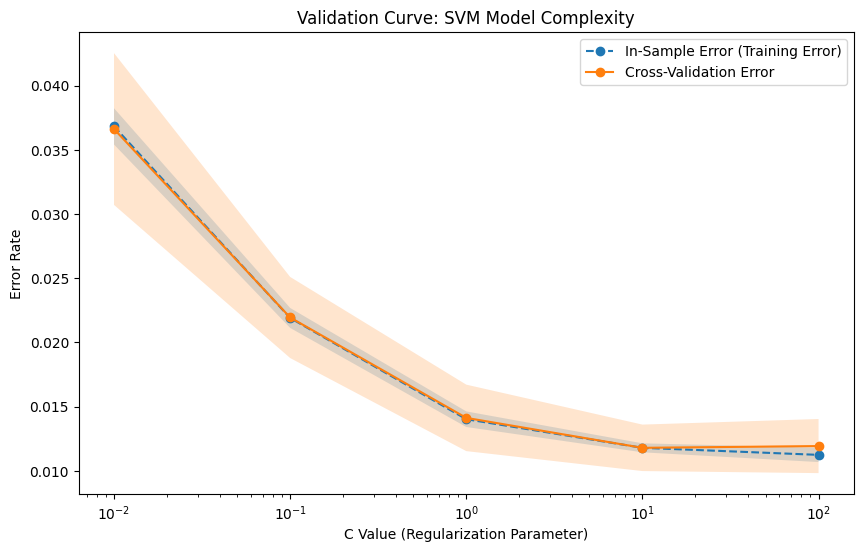

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve


svm = SVC()

# Define the parameter range for C
param_range = [0.01, 0.1, 1, 10, 100]

# Calculate cross-validation scores
train_scores, test_scores = validation_curve(
    svm, X, y, param_name='C', param_range=param_range, cv=5, scoring='accuracy'
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, 1 - train_mean, label='In-Sample Error (Training Error)', linestyle='--', marker='o')
plt.plot(param_range, 1 - test_mean, label='Cross-Validation Error', linestyle='-', marker='o')

# Fill the area between the lines to represent the variability of the scores
plt.fill_between(param_range, 1 - train_mean - train_std, 1 - train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, 1 - test_mean - test_std, 1 - test_mean + test_std, alpha=0.2)

# Set plot labels and title
plt.xlabel('C Value (Regularization Parameter)')
plt.ylabel('Error Rate')
plt.title('Validation Curve: SVM Model Complexity')
plt.xscale('log')  # Log scale for better visualization with C values
plt.legend()
plt.show()


The validation curve illustrates the in-sample error (training error) and cross-validation error for different C values in an SVM model. The x-axis represents the regularization parameter (C) on a logarithmic scale, and the y-axis represents the error rate. The dashed line indicates the in-sample error, and the solid line shows the cross-validation error. The shaded areas around the lines represent the variability of the scores. The plot helps identify the optimal C value that balances model complexity and generalization performance.

Task3 LP1

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

best_kernel = 'rbf'  # Replace with the best kernel from cross-validation
best_C = 10  # Replace with the best C value from cross-validation

# Train the final SVM hypothesis on the entire training dataset
final_svm = SVC(kernel=best_kernel, C=best_C)
final_svm.fit(X, y)

# Predict on the entire training dataset
y_pred_train = final_svm.predict(X)

# Calculate and report in-sample error
in_sample_error = 1 - accuracy_score(y, y_pred_train)
print(f"In-Sample Error for the Final SVM Hypothesis: {in_sample_error:.2%}")


In-Sample Error for the Final SVM Hypothesis: 1.17%


LP2

In [16]:

file_path = '/content/ZipDigits (1).test'
binary_filtered_digit_test_df = get_preprocessed_digits_dataframe(file_path)
binary_filtered_digit_test_df = binary_filtered_digit_test_df.rename(columns={'label': 'y'})
binary_filtered_digit_test_df = calculate_intensity(binary_filtered_digit_test_df)
binary_filtered_digit_test_df = calculate_symmetry(binary_filtered_digit_test_df)
test_df = binary_filtered_digit_test_df[['x1', 'x2', 'y']]
positive_test_df = test_df[test_df['y'] == 1]
negative_test_df = test_df[test_df['y'] == -1]


# Separate features (X_test) and labels (y_test)
X_test = test_df[['x1', 'x2']]
y_test = test_df['y']  # Replace 'y' with the actual column name if different

# Predict on the test dataset
y_pred_test = final_svm.predict(X_test)

# Calculate and report the final test error
test_error = 1 - accuracy_score(y_test, y_pred_test)
print(f"Final Test Error for the SVM Hypothesis: {test_error:.2%}")


Final Test Error for the SVM Hypothesis: 1.60%
